# SIMULATING LASER-INDUCED POPULATION TRANSFER BY ADIABATIC PASSAGE VIA SCIENTIFIC PYTHON

### Abstract

In this paper I simulate laser-induced population transfer by adiabatic passage (also known as Stimulated Raman Adiabatic Passage or STIRAP) using the scientific python libraries Scipy and Numpy. I then implement two different simulations over the parameter space of the STIRAP model in order to find when the adiabatic assumption is valid.

#### Keywords: Computational Physics, Stimulated Raman Adiabatic Passage, STIRAP, Python, Numpy, Scipy


### Introduction

My goal is to model adiabatic passage between two levels in a three-level atom interacting with two laser fields using Scipy and Numpy.![three-level atom][1]. 

To get the coefficients of each of the three states I use

$$
i\frac{d}{dt}\left( \begin{array}{c}
c_1 \\
c_2 \\
c_3  \end{array} \right) = \left( \begin{array}{ccc}
0 & \Omega_1(t) & 0 \\
\Omega_1(t) & 0 & \Omega_2(t) \\
0 & \Omega_2(t) & 0 \end{array} \right)\left( \begin{array}{c}
c_1 \\
c_2 \\
c_3  \end{array}\right)
$$

Where $\Omega_{1,2}(t)$ give the (slow) time dependence of the amplitudes of the electric fields generated by the two laser beams. The initial conditions are $c_1(-\infty) = 1, c_2(-\infty) = c_3(-\infty) = 0 $.

I assume the Gaussian forms of $\Omega_{1,2}(t)$:

$$
\Omega_{1}(t) = exp(-(t-\tau)^2/T^2)
$$

and

$$
\Omega_{2}(t) = exp(-(t+\tau)^2/T^2)
$$

where $\tau$ is the delay time such that a positive value of $\tau$ means that field 2 is switched on before field 1. $T$ sets the duration of the pulses.

### Methods
In order to solve my complex differential equations, I utilize scipy's `integrate.complex_ode` function as well as `cmath`, python's native complex function library. `Pylab` and `Matplotlib` provide graphing capabilities. Code, $\LaTeX$, and markdown is presented via IPython notebook.

I start by importing the relevant libraries.

In [1]:
import numpy as np
import scipy as sp
from scipy.integrate import complex_ode
import matplotlib.pyplot as plt
import cmath
from cmath import exp
import pylab as p

%matplotlib inline


I then create two methods $\Omega_{1}(t)$ and $\Omega_{2}(t)$.

In [12]:

def omega1(t,tau=tau,T=T):
    return exp(-(t - tau)**2/T**2)

def omega2(t,tau=tau,T=T):
    return exp(-(t + tau)**2/T**2)

I now define the three coupled complex ordinary differential equations.

In [13]:
def g(t, y, tau=tau, T=T):
    c1_i = y[0]
    c2_i = y[1]
    c3_i = y[2]

    g1 = -1.0j*omega1(t, tau, T)*c2_i
    g2 = -1.0j*(omega1(t, tau, T)*c1_i + omega2(t)*c3_i)
    g3 = -1.0j*omega2(t, tau, T)*c2_i
    return [g1, g2, g3]

Next I initialize the model. Note that in the definition I set a default step size of 1000. The model depends on creating an array of time values via `np.linspace` which are used to recursively approximate solutions to the differential equations (hence the `while` loop). 

Within the while loop, I take the real component of each successive computed coefficient and square it to get the corresponding probabilities.

In [20]:
def model(tau, T, step_size=1000):
    
    # initial conditions
    c1_0 = 1
    c2_0 = 0
    c3_0 = 0

    y0 = [c1_0, c2_0, c3_0]

 
    t_max = 2*tau + 4*T
    t_min = -t_max
    delta_t = (t_max - t_min)/step_size

    t = np.linspace(t_max, t_min, step_size) # time grid
    # Solve the ODEs
    r = complex_ode(g)
    r.set_initial_value(y0, t_min)
    #r.set_f_params(tau, T)
    c1_squared = []
    c2_squared = []
    c3_squared = []
    t = []
    while r.successful() and r.t < t_max:
        r.integrate(r.t+delta_t)
        c1_squared.append(cmath.polar(r.y[0])[0]**2)
        c2_squared.append(cmath.polar(r.y[1])[0]**2)
        c3_squared.append(cmath.polar(r.y[2])[0]**2)
        t.append(r.t)
    return c1_squared, c2_squared, c3_squared, t


### Results

Choosing positive and negative $\tau$ close to zero and setting $T$ equal to one produces a range of behaviour.

Near ideal model results are found near $\tau = \frac{1}{2}$ and $T = 2$.

#### Conclusions


  [1]: http://i.stack.imgur.com/tIumF.jpg

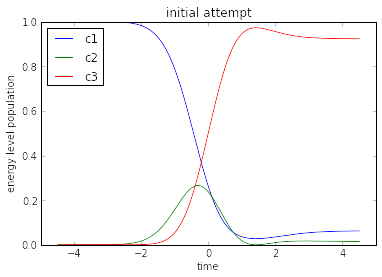

In [2]:
import numpy as np
import scipy as sp
from scipy.integrate import complex_ode
import matplotlib.pyplot as plt
import cmath
from cmath import exp
import pylab as p

%matplotlib inline


tau = .5
T = 2
def omega1(t,tau=tau,T=T):
    return exp(-(t - tau)**2/T**2)

def omega2(t,tau=tau,T=T):
    return exp(-(t + tau)**2/T**2)

def g(t, y,tau=tau,T=T):
    c1_i = y[0]
    c2_i = y[1]
    c3_i = y[2]

    g1 = -1.0j*omega1(t, tau, T)*c2_i
    g2 = -1.0j*(omega1(t, tau, T)*c1_i + omega2(t)*c3_i)
    g3 = -1.0j*omega2(t, tau, T)*c2_i
    return [g1, g2, g3]
    
def model(tau, T, step_size=1000):
    
    # initial conditions
    c1_0 = 1
    c2_0 = 0
    c3_0 = 0

    y0 = [c1_0, c2_0, c3_0]

 
    t_max = 5*tau + T
    t_min = -t_max
    delta_t = (t_max - t_min)/step_size

    t = np.linspace(t_max, t_min, step_size) # time grid
    # Solve the ODEs
    r = complex_ode(g)
    r.set_initial_value(y0, t_min)
    c1_squared = []
    c2_squared = []
    c3_squared = []
    t = []
    while r.successful() and r.t < t_max:
        r.integrate(r.t+delta_t)
        c1_squared.append(cmath.polar(r.y[0])[0]**2)
        c2_squared.append(cmath.polar(r.y[1])[0]**2)
        c3_squared.append(cmath.polar(r.y[2])[0]**2)
        t.append(r.t)
    return c1_squared, c2_squared, c3_squared, t


c1_squared, c2_squared, c3_squared, t = model(tau, T)

# plot results
plt.figure()
plt.plot(t, c1_squared, label='c1')
plt.plot(t, c2_squared, label='c2')
plt.plot(t, c3_squared, label='c3')

plt.xlabel('time')
plt.ylabel('energy level population')
plt.title('initial attempt')
plt.legend(loc=0)

/usr/local/lib/python3.3/dist-packages/numpy/core/numeric.py:462: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


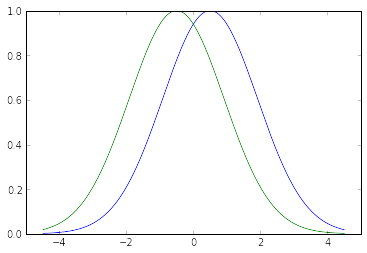

In [3]:

f1 = np.vectorize(omega1)
f2 = np.vectorize(omega2)


# plot results
plt.figure()
plt.plot(t, f1(t), label='omega1')
plt.plot(t, f2(t), label='omega2')

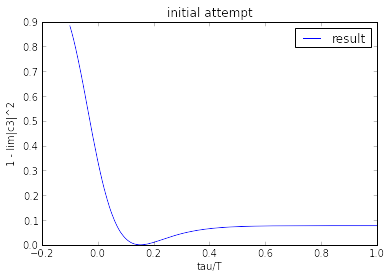

In [ ]:
def s(tau, T):
    c1_squared, c2_squared, c3_squared, t = model(tau, T)
    return 1 - c3_squared[-1]

def q(tau, T):
    c1_squared, c2_squared, c3_squared, t = model(tau, T)
    return max(c2_squared)

step_size = 1000
tau_T_ratio = np.linspace(-.1,1,step_size)

c1_squared, c2_squared, c3_squared, t = model(tau_T_ratio[0],1,step_size)
T = 1
res = [s(tau*T, T) for tau in tau_T_ratio]

# plot results
plt.figure()
plt.plot(tau_T_ratio, res, label='result')

plt.xlabel('tau/T')
plt.ylabel('1 - lim|c3|^2')
plt.title('initial attempt')
plt.legend(loc=0)

In [ ]:
res1 = [q(tau*1, 1) for tau in tau_T_ratio]
res2 = [q(tau*10, 10) for tau in tau_T_ratio]
res3 = [q(tau*100, 100) for tau in tau_T_ratio]
res4 = [q(tau*1000, 1000) for tau in tau_T_ratio]



In [ ]:
plt.figure()
plt.subplot(311)
plt.plot(tau_T_ratio, res1, label='result')

plt.xlabel('tau/T')
plt.ylabel('max|c_2|^2')
plt.title('T = 1')
plt.legend(loc=0)

plt.subplot(331)
plt.plot(tau_T_ratio, res2, label='result')

plt.xlabel('tau/T')
plt.ylabel('max|c_2|^2')
plt.title('T = 10')
plt.legend(loc=0)

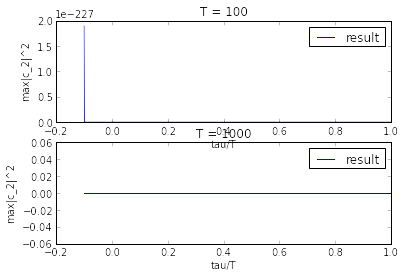

In [7]:
plt.figure()
plt.subplot(211)
plt.plot(tau_T_ratio, res3, label='result')

plt.xlabel('tau/T')
plt.ylabel('max|c_2|^2')
plt.title('T = 100')
plt.legend(loc=0)

plt.subplot(212)
plt.plot(tau_T_ratio, res4, label='result')

plt.xlabel('tau/T')
plt.ylabel('max|c_2|^2')
plt.title('T = 1000')
plt.legend(loc=0)

### 